In [2]:

#Practice 3.01

# Bank Customer Segmentation for loan Campaign

#1 import necessary libraries for data processing, visualization, and clustering
#2 Load data into a pandas dataframe and display the top 5 rows. Using the info method, get an understanding the data
#3 perform standard scaling on Income and CCAVG. Create new IIncome_scaled and CCavg_scaled columns. Descriptive summary 
#4 Perform k-means clustoering, specifying 3 clusters using Income and CCAVG
    # random_state= 42, create a newcolumn "Cluster" predicting the model.
#5 Visulaize the clusters by using different amrkers on a scatter plot between Income and CCavg
#6 To understand the clusters, print the average values of Income and CCavg for the three clusters
#7 Perform a visual comparison of the clusters using standardized values for Income and CCavg
#8 To understand the clusters better using tother relevant features,
    # print the average values against the clusters for the AGE, Mortgage, Family, CC, Online, and Personal loan
    # Chech which cluster has the highest propensity for taking a personal loan.
#9 Based on teh understanding of the clusters, assign descriptive labels to the clusters.


In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
bank = pd.read_csv("DataSets/Bank_Personal_Loan_Modelling-1.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
scaler = StandardScaler()

bank[['Income_Scaled', 'CCAvg_scaled']] = scaler.fit_transform(bank[['Income', 'CCAvg']])

bank[['Income_Scaled', 'CCAvg_scaled']].describe()

,Income_Scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


In [10]:
model = KMeans(n_clusters = 3, random_state=42)

cluster_cols = ['Income_Scaled', 'CCAvg_scaled']
model.fit(bank[cluster_cols])

bank['Cluster'] = model.predict(bank[cluster_cols])

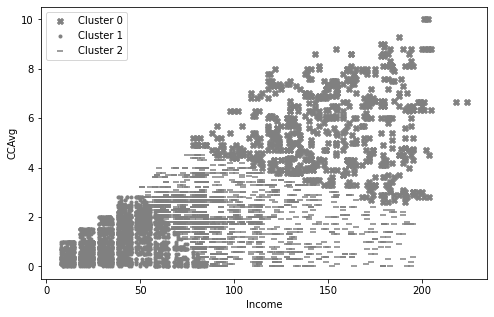

In [11]:
markers = ['X', '.', '_']

plt.figure(figsize =[8,5])
for clust in range(3):
    temp = bank[bank.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg,
                marker = markers[clust],
                color = 'gray',
                label = "Cluster " + str(clust))
    
plt.xlabel('Income')
plt.ylabel("CCAvg")
plt.legend()
plt.show()

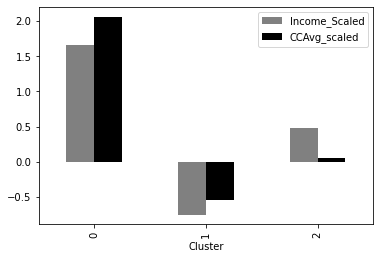

In [12]:
bank.groupby('Cluster')[['Income_Scaled', 'CCAvg_scaled']].mean().plot.bar(color=['gray','black'])
plt.show()

In [13]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', \
            'CreditCard', 'Online', 'Personal Loan']
bank.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.390282,5.540345,43.924765,89.537618,2.017241,0.285266,0.605016,0.413793
1,39.135072,0.982417,45.797197,42.231218,2.513429,0.294667,0.592448,0.000000
2,96.142777,2.025165,45.184049,65.185165,2.363636,0.296152,0.600112,0.120468


End of Activity 3.01

In [24]:
#Practice 3.02

#1: Create a copy of the dataset named bank_scaled, and perform standard scaling of the income, CCAVG, Age, Experience, and Mortgage columns.

#2: Get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.

#3: Perform k-means clustering, speccifying 3 clusters using the scaled features.
#Specify random_state = 42

#4: Using PCA on the scaled columns, create two new columns, pc1 and pc2, containing the data for PC1 and PC2 respectively.

#5 Visualize the clusters by using different markers for the clusters on a scatter plot between pc1 and pc2.

#6: To understand the clusters,print the average values if the features used for clustering against the 3 clusters.
# Check which features are the most differentiated for the clusters.

#7: To understand clusters better using other relevant features, print the average values against the cluster for
# Age, Mortgage, Family, CreditCard Online, and Personal Loan.

#8: Based on your understanding of the clusters, assign descriptive labels to the clusters.

In [27]:
# Question 1: 
bank_scaled = bank.copy()

scaler = StandardScaler()

Features = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']
bank_scaled[Features] = scaler.fit_transform(bank[Features])


#Question 2
bank_scaled[Features].describe()

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17,2.478018e-17,-1.693312e-16,2.810197e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


In [28]:
#Question 3

model = KMeans(n_clusters=3, random_state=42)
model.fit(bank_scaled[Features])

bank_scaled['Cluster'] = model.predict(bank_scaled[Features])

In [29]:
#Question 4

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[Features])

bank_scaled['pc1'] = pca_res[:,0]
bank_scaled['pc2'] = pca_res[:,1]

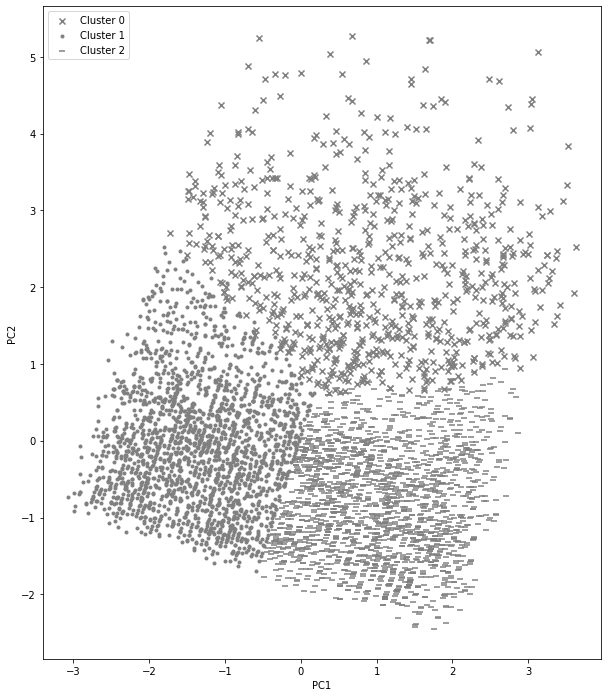

In [30]:
#Question 5

markers = ['x', '.', '_']
plt.figure(figsize=[10,12])

for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color='gray')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [32]:
#Question 6
bank['Cluster'] = bank_scaled.Cluster
bank.groupby('Cluster')[Features].mean()

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,147.650185,4.856403,43.672435,18.644005,116.279357
1,58.941774,1.367514,55.536044,30.233826,45.134935
2,60.124322,1.382121,35.116428,9.873705,44.771584


In [33]:
#Question 7
sel_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage', \
            'Family', 'CreditCard', 'Online', 'Personal Loan']

bank.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,,
0,147.650185,4.856403,43.672435,18.644005,116.279357,2.002472,0.299135,0.613103,0.398022
1,58.941774,1.367514,55.536044,30.233826,45.134935,2.397874,0.300370,0.604898,0.039741
2,60.124322,1.382121,35.116428,9.873705,44.771584,2.552047,0.285150,0.581648,0.035520


In [34]:
#Question 8

#Key differentiating features for the clusters are Age and CCAvg.

#Cluster 0 - High Income, high Spend, Middle Age, Highest propensity to take out Personal Loan

#Cluster 1 - Low spend, old age, average income

#Cluster 2 - Young, average income, low spend. 



End of Activity 3.02